In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
import syllabenn_ranna_kw as syl
import codecs
import os
from collections import defaultdict


In [3]:
infiles = os.listdir("kernewek_corpus/kemmyn_prefstrip")
print(infiles)

['mckk_stripped.txt', 'solempnyta_kk.txt', 'skeulanyeth1_kw_kk.txt', 'bmkk_stripped.txt', 'omkkks_stripped.txt', 'tregkk_stripped_removebrackets3_removecrossed.txt', 'charfrag_kk_stripped.txt', 'tolkien_kk.txt', 'rdkk_stripped.txt', 'cwkk_stripped.txt', 'pckk_stripped.txt']


In [4]:
fnamestuple = enumerate(infiles)

In [5]:
Nf = -1
while (not(Nf in range(11))):
    try:
        print(list(fnamestuple))
        Nf = input("choose number between 0 and 10 to select file\n")
        Nf = int(Nf)
    except:
        print("should be integer betweeen 0-10")

[(0, 'mckk_stripped.txt'), (1, 'solempnyta_kk.txt'), (2, 'skeulanyeth1_kw_kk.txt'), (3, 'bmkk_stripped.txt'), (4, 'omkkks_stripped.txt'), (5, 'tregkk_stripped_removebrackets3_removecrossed.txt'), (6, 'charfrag_kk_stripped.txt'), (7, 'tolkien_kk.txt'), (8, 'rdkk_stripped.txt'), (9, 'cwkk_stripped.txt'), (10, 'pckk_stripped.txt')]
choose number between 0 and 10 to select file
0


In [6]:
infiles2 = [os.path.join("kernewek_corpus/kemmyn_prefstrip", f) for f in infiles]

In [7]:
# run the syllable segmentation program
# as the default, it will use reverse segmentation starting from the end of each word
infilename = infiles[Nf]
infilename2 = infiles2[Nf]

infile = codecs.open(infilename2, "r", encoding="utf-8", errors="replace")
inputtext = infile.read()
inputtext = syl.preprocess2ASCII(inputtext)
regexps = syl.kwKemmynRegExp
rannans = syl.RannaSyllabenn(inputtext)
counts = syl.CountAllSyls()
for i in rannans.geryow:
    g = syl.Ger(i,rannans, counts, fwds=False, regexps=regexps,
                    FSSmode=False,
                    CYmode=False, gwarnya=False)
#print(syl.totalcountsOutput(counts))

In [8]:
# running the above program will mean a variable counts is created which is a CountAllSyls object
# which contains a number of variables such as counts.NSylTotal
print("Total number of syllables in text = {NSyl}".format(NSyl=counts.NSylTotal))

Total number of syllables in text = 14678


In [9]:
# get the dictionary of syllables and their frequencies out of the CountAllSyls object
# and use the function to remove any punctuation characters
AllSyllablesDict_nopunct = counts.remove_punctchars(counts.AllSyllablesDict)

In [10]:
#make it into a list of tuples
AllSyllablesDictkv = [(k,v) for (k,v) in AllSyllablesDict_nopunct.items()]

In [11]:
# sort the syllables alphabetically
counts.AllSyllablesAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0], reverse=False)

In [12]:
print("All syllables found in text, with frequencies")
print(counts.AllSyllablesAlphaSort)

All syllables found in text, with frequencies
[('a', 759), ('am', 11), ('an', 353), ('ank', 1), ('ans', 3), ('ar', 51), ('argh', 1), ('as', 29), ('at', 2), ('ath', 6), ('av', 1), ('ay', 18), ('ba', 12), ('ban', 4), ('bann', 6), ('barth', 14), ('bas', 5), ('bay', 5), ('bayn', 7), ('be', 39), ('bech', 1), ('bedh', 7), ('begh', 3), ('bel', 19), ('bell', 4), ('ben', 6), ('benn', 22), ('ber', 5), ('berth', 6), ('bes', 1), ('beu', 2), ('beus', 2), ('bi', 15), ('bis', 11), ('bla', 1), ('blas', 1), ('ble', 3), ('bleg', 1), ('bleth', 1), ('bleuj', 1), ('blon', 1), ('bludh', 1), ('bly', 1), ('blys', 1), ('bo', 22), ('bodh', 5), ('boemm', 2), ('boes', 4), ('bok', 2), ('boll', 1), ('bor', 1), ('bos', 31), ('bost', 1), ('bows', 4), ('bras', 32), ('brath', 2), ('bray', 1), ('bre', 10), ('bren', 2), ('breu', 1), ('breus', 3), ('bri', 4), ('bris', 4), ('bro', 1), ('bron', 2), ('bronk', 2), ('bronn', 1), ('bry', 2), ('bryn', 1), ('brys', 1), ('bryv', 1), ('bu', 2), ('bub', 7), ('buk', 1), ('bur', 2), (

In [13]:
print("Total number of different syllables = {t}".format(t=len(counts.AllSyllablesAlphaSort)))

Total number of different syllables = 1226


In [14]:
counts.keyvaltups()
topN = 20
print("Top {n} syllables = {s}".format(n=topN,s=counts.AllSyllablesDSort[:topN]))

Top 20 syllables = [('a', 759), ('y', 512), ('yn', 419), ('an', 353), ('e', 310), ('dhe', 258), ('na', 252), ('ha', 227), ('o', 155), ('krist', 153), ('sa', 120), ('rag', 118), ('dha', 115), ('le', 111), ('i', 110), ('ya', 107), ('ny', 105), ('ma', 103), ('sus', 101), ('hag', 99)]


In [15]:
# punctuation characters are now removed

In [16]:
len([t for t in counts.AllSyllablesAlphaSort if "'" in t[0]])

0

In [17]:
len([t for t in counts.AllSyllablesAlphaSort if "-" in t[0]])

0

In [18]:
len([t for t in counts.AllSyllablesAlphaSort if '"' in t[0]])

0

In [19]:
# count up how many syllables start with each letter of the alphabet

In [20]:
# q, x not used in Kernewek Kemmyn
# z only for a few loan words, and c only in digraph ch but haven't made assumption here

In [21]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"

In [22]:
sylls_letter = defaultdict(list)
totalsyls_letter = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables starting with the letter
        sylls_letter[i].append(t)
    # list the syllables starting with the letter
    print("Syllables starting with {L}".format(L=i))
    print(sylls_letter[i])
    # fill the totalsyls_letter dictionary
    # with the sum of the frequencies of all syllables
    # starting with each letter
    total_starting_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_starting_letter))
    totalsyls_letter[i] = total_starting_letter

Syllables starting with a
[('a', 759), ('am', 11), ('an', 353), ('ank', 1), ('ans', 3), ('ar', 51), ('argh', 1), ('as', 29), ('at', 2), ('ath', 6), ('av', 1), ('ay', 18)]
total number = 1235
Syllables starting with b
[('ba', 12), ('ban', 4), ('bann', 6), ('barth', 14), ('bas', 5), ('bay', 5), ('bayn', 7), ('be', 39), ('bech', 1), ('bedh', 7), ('begh', 3), ('bel', 19), ('bell', 4), ('ben', 6), ('benn', 22), ('ber', 5), ('berth', 6), ('bes', 1), ('beu', 2), ('beus', 2), ('bi', 15), ('bis', 11), ('bla', 1), ('blas', 1), ('ble', 3), ('bleg', 1), ('bleth', 1), ('bleuj', 1), ('blon', 1), ('bludh', 1), ('bly', 1), ('blys', 1), ('bo', 22), ('bodh', 5), ('boemm', 2), ('boes', 4), ('bok', 2), ('boll', 1), ('bor', 1), ('bos', 31), ('bost', 1), ('bows', 4), ('bras', 32), ('brath', 2), ('bray', 1), ('bre', 10), ('bren', 2), ('breu', 1), ('breus', 3), ('bri', 4), ('bris', 4), ('bro', 1), ('bron', 2), ('bronk', 2), ('bronn', 1), ('bry', 2), ('bryn', 1), ('brys', 1), ('bryv', 1), ('bu', 2), ('bub', 7)

In [23]:
print("Total syllables starting with each letter of the alphabet:\n{T}".format(T=totalsyls_letter))

Total syllables starting with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 1235, 'b': 471, 'c': 9, 'd': 1660, 'e': 605, 'f': 258, 'g': 884, 'h': 740, 'i': 110, 'j': 72, 'k': 610, 'l': 685, 'm': 698, 'n': 936, 'o': 443, 'p': 502, 'q': 0, 'r': 635, 's': 908, 't': 586, 'u': 86, 'v': 700, 'w': 573, 'x': 0, 'y': 1272, 'z': 0})


In [24]:
# repeat the process for two letter combinations starting the syllable
sylls_2letter = defaultdict(list)
totalsyls_2letter = defaultdict(int)
# this time, assume no q, x, z
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [25]:
# use a nested loop for the two letter combinations
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .startswith rather than == to avoid error with single character syllables
        letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0:2].startswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv:
            sylls_2letter[twoletters].append(t)
        if len(letter_dictkv) > 0:
            print("Syllables starting with {L}".format(L=twoletters))
            print(sylls_2letter[twoletters])
            total_starting_2letter = sum(t[1] for t in letter_dictkv)
            totalsyls_2letter[twoletters] = total_starting_2letter

Syllables starting with am
[('am', 11)]
Syllables starting with an
[('an', 353), ('ank', 1), ('ans', 3)]
Syllables starting with ar
[('ar', 51), ('argh', 1)]
Syllables starting with as
[('as', 29)]
Syllables starting with at
[('at', 2), ('ath', 6)]
Syllables starting with av
[('av', 1)]
Syllables starting with ay
[('ay', 18)]
Syllables starting with ba
[('ba', 12), ('ban', 4), ('bann', 6), ('barth', 14), ('bas', 5), ('bay', 5), ('bayn', 7)]
Syllables starting with be
[('be', 39), ('bech', 1), ('bedh', 7), ('begh', 3), ('bel', 19), ('bell', 4), ('ben', 6), ('benn', 22), ('ber', 5), ('berth', 6), ('bes', 1), ('beu', 2), ('beus', 2)]
Syllables starting with bi
[('bi', 15), ('bis', 11)]
Syllables starting with bl
[('bla', 1), ('blas', 1), ('ble', 3), ('bleg', 1), ('bleth', 1), ('bleuj', 1), ('blon', 1), ('bludh', 1), ('bly', 1), ('blys', 1)]
Syllables starting with bo
[('bo', 22), ('bodh', 5), ('boemm', 2), ('boes', 4), ('bok', 2), ('boll', 1), ('bor', 1), ('bos', 31), ('bost', 1), ('bows'

In [26]:
print("Total syllables starting with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter))
print("Total number of different 2 letter combinations that start syllables = {N2}".format(N2=len(totalsyls_2letter)))

Total syllables starting with each two letters of the alphabet:
defaultdict(<class 'int'>, {'am': 11, 'an': 357, 'ar': 52, 'as': 29, 'at': 8, 'av': 1, 'ay': 18, 'ba': 53, 'be': 117, 'bi': 26, 'bl': 12, 'bo': 73, 'br': 70, 'bu': 12, 'by': 108, 'ch': 9, 'da': 67, 'de': 302, 'dh': 892, 'di': 56, 'do': 52, 'dr': 174, 'du': 21, 'dy': 96, 'el': 8, 'em': 1, 'en': 23, 'ep': 1, 'er': 26, 'es': 33, 'et': 38, 'eu': 49, 'ev': 99, 'ew': 8, 'ey': 9, 'fa': 67, 'fe': 65, 'fi': 22, 'fl': 7, 'fo': 43, 'fr': 15, 'fu': 3, 'fy': 36, 'ga': 226, 'ge': 101, 'gh': 97, 'gi': 14, 'gl': 29, 'gn': 3, 'go': 177, 'gr': 59, 'gu': 18, 'gw': 122, 'gy': 38, 'ha': 421, 'he': 120, 'hi': 24, 'ho': 33, 'hu': 8, 'hw': 98, 'hy': 36, 'ja': 6, 'je': 19, 'jo': 17, 'ju': 21, 'jy': 9, 'ka': 57, 'ke': 154, 'ki': 9, 'kl': 32, 'ko': 78, 'kr': 211, 'ku': 18, 'kw': 20, 'ky': 31, 'la': 169, 'le': 213, 'li': 61, 'll': 128, 'lo': 94, 'lu': 3, 'ly': 17, 'ma': 327, 'me': 171, 'mi': 11, 'mo': 47, 'mu': 3, 'my': 139, 'na': 388, 'ne': 167, 'ni

In [27]:
# convert the defaultdict into a list of tuples
syls_2letter = [t for t in totalsyls_2letter]

In [28]:
# list of integers of the frequencies
syls_2letterN = [totalsyls_2letter[t] for t in totalsyls_2letter]
print(syls_2letterN)

[11, 357, 52, 29, 8, 1, 18, 53, 117, 26, 12, 73, 70, 12, 108, 9, 67, 302, 892, 56, 52, 174, 21, 96, 8, 1, 23, 1, 26, 33, 38, 49, 99, 8, 9, 67, 65, 22, 7, 43, 15, 3, 36, 226, 101, 97, 14, 29, 3, 177, 59, 18, 122, 38, 421, 120, 24, 33, 8, 98, 36, 6, 19, 17, 21, 9, 57, 154, 9, 32, 78, 211, 18, 20, 31, 169, 213, 61, 128, 94, 3, 17, 327, 171, 11, 47, 3, 139, 388, 167, 86, 76, 219, 9, 73, 25, 6, 63, 4, 1, 2, 103, 2, 136, 63, 73, 9, 43, 63, 70, 45, 265, 173, 89, 39, 5, 64, 156, 110, 15, 83, 133, 3, 88, 24, 83, 142, 5, 66, 76, 140, 100, 9, 41, 95, 3, 29, 93, 5, 46, 2, 112, 233, 71, 3, 89, 37, 1, 154, 127, 103, 31, 44, 163, 59, 8, 38, 165, 18, 15, 4, 420, 23, 6, 35, 74]


Text(0.5, 1.0, 'Counts of initial two letters of all syllables in mckk_stripped.txt')

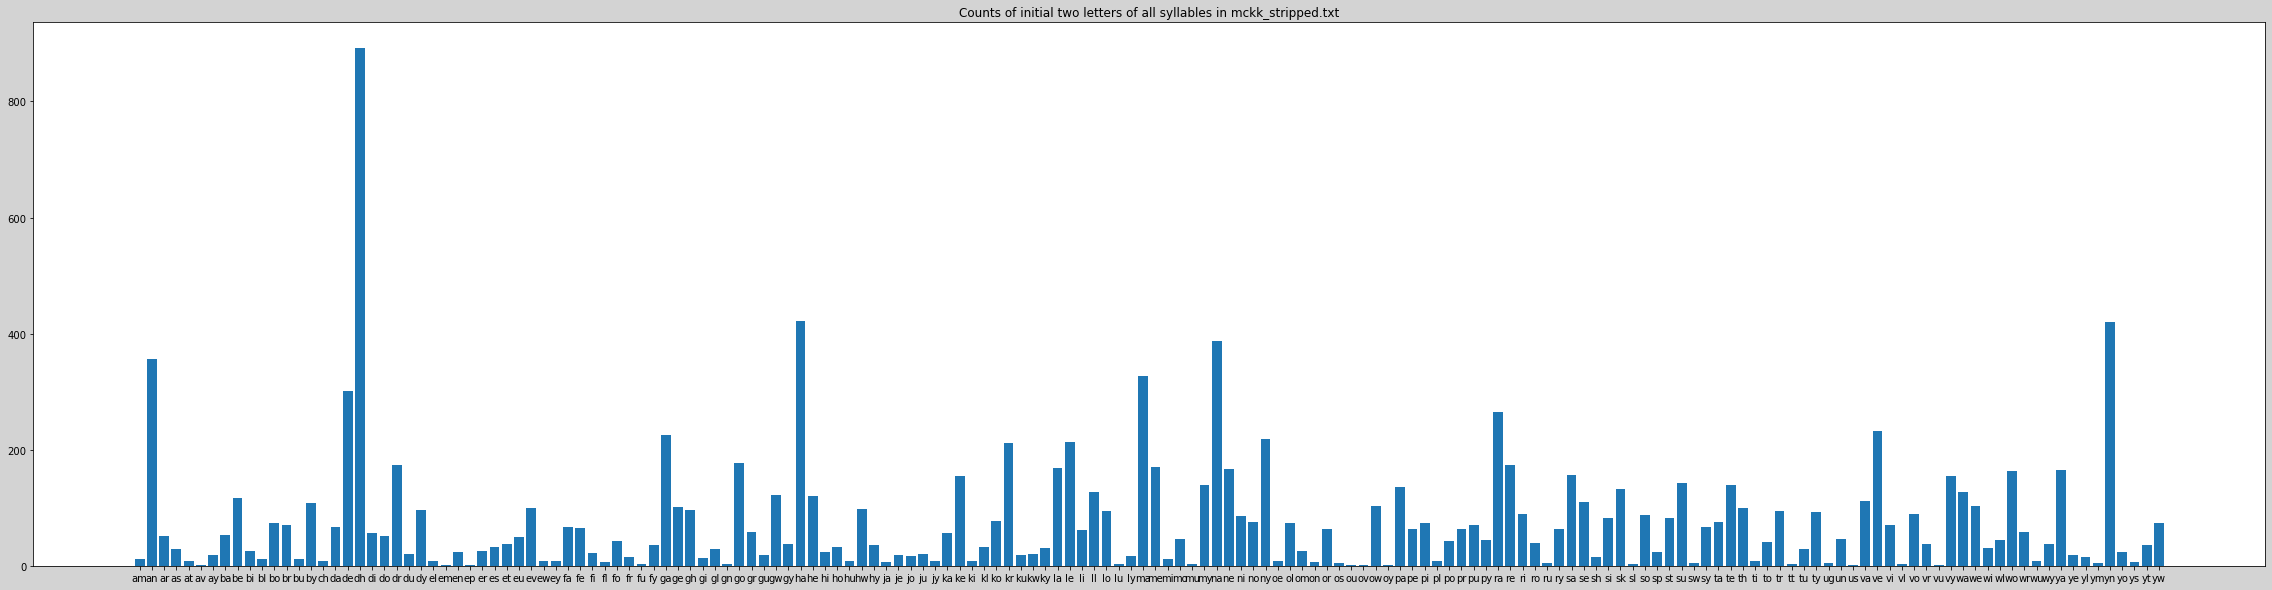

In [29]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter))
p1 = ax.bar(ind, syls_2letterN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter)
title = "Counts of initial two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [30]:
# create a 2D histogram of the frequencies
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter[twoletters])

In [31]:
#print(hist2d)

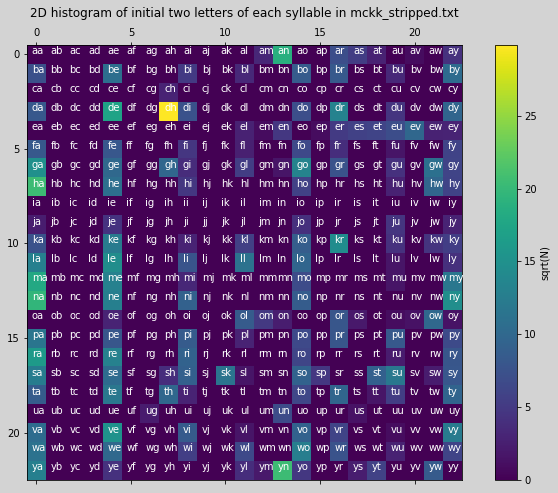

In [32]:
fig = plt.figure(figsize=[12,8], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of initial two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")

In [33]:
# sort by the end letter of the syllable
counts.AllSyllablesRevAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0][-1], reverse=False)

In [34]:
print("All syllables found in text, with frequencies, sorted by final letter")
print(counts.AllSyllablesRevAlphaSort)

All syllables found in text, with frequencies, sorted by final letter
[('ha', 227), ('a', 759), ('la', 82), ('va', 37), ('ka', 37), ('ra', 68), ('ma', 103), ('dha', 115), ('na', 252), ('ya', 107), ('ga', 63), ('sa', 120), ('gha', 13), ('vra', 16), ('tra', 15), ('gwra', 7), ('ba', 12), ('da', 20), ('wra', 13), ('lla', 35), ('tha', 25), ('pa', 15), ('ta', 58), ('hwa', 8), ('fa', 14), ('dra', 5), ('wa', 16), ('bla', 1), ('kla', 1), ('wla', 15), ('ska', 3), ('skwa', 2), ('cha', 1), ('kra', 1), ('sta', 2), ('pra', 1), ('gra', 1), ('ttha', 2), ('swa', 1), ('stla', 1), ('mab', 34), ('neb', 27), ('vab', 3), ('bub', 7), ('pub', 20), ('heb', 23), ('ryb', 4), ('ord', 5), ('kord', 2), ('sped', 3), ('shynd', 4), ('vold', 1), ('skward', 5), ('red', 2), ('tred', 1), ('sord', 1), ('re', 95), ('dhe', 258), ('e', 310), ('ne', 35), ('me', 35), ('be', 39), ('spre', 2), ('fe', 17), ('dre', 86), ('gwe', 19), ('pe', 31), ('ke', 46), ('ge', 28), ('pre', 17), ('skwe', 6), ('de', 85), ('se', 28), ('te', 47), ('

In [35]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"
sylls_letter_end = defaultdict(list)
totalsyls_letter_end = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][-1].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables ending with the letter
        sylls_letter_end[i].append(t)
    # list the syllables ending with the letter
    print("Syllables ending with {L}".format(L=i))
    print(sylls_letter_end[i])
    # fill the totalsyls_letter_end dictionary
    # with the sum of the frequencies of all syllables
    # ending with each letter
    total_ending_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_ending_letter))
    totalsyls_letter_end[i] = total_ending_letter

Syllables ending with a
[('a', 759), ('ba', 12), ('bla', 1), ('cha', 1), ('da', 20), ('dha', 115), ('dra', 5), ('fa', 14), ('ga', 63), ('gha', 13), ('gra', 1), ('gwra', 7), ('ha', 227), ('hwa', 8), ('ka', 37), ('kla', 1), ('kra', 1), ('la', 82), ('lla', 35), ('ma', 103), ('na', 252), ('pa', 15), ('pra', 1), ('ra', 68), ('sa', 120), ('ska', 3), ('skwa', 2), ('sta', 2), ('stla', 1), ('swa', 1), ('ta', 58), ('tha', 25), ('tra', 15), ('ttha', 2), ('va', 37), ('vra', 16), ('wa', 16), ('wla', 15), ('wra', 13), ('ya', 107)]
total number = 2274
Syllables ending with b
[('bub', 7), ('heb', 23), ('mab', 34), ('neb', 27), ('pub', 20), ('ryb', 4), ('vab', 3)]
total number = 118
Syllables ending with c
[]
total number = 0
Syllables ending with d
[('kord', 2), ('ord', 5), ('red', 2), ('shynd', 4), ('skward', 5), ('sord', 1), ('sped', 3), ('tred', 1), ('vold', 1)]
total number = 24
Syllables ending with e
[('be', 39), ('ble', 3), ('bre', 10), ('che', 3), ('de', 85), ('dhe', 258), ('dhre', 3), ('doe',

In [36]:
print("Total syllables ending with each letter of the alphabet:\n{T}".format(T=totalsyls_letter_end))

Total syllables ending with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 2274, 'b': 118, 'c': 0, 'd': 24, 'e': 1626, 'f': 53, 'g': 319, 'h': 739, 'i': 791, 'j': 9, 'k': 67, 'l': 475, 'm': 223, 'n': 2000, 'o': 603, 'p': 45, 'q': 0, 'r': 788, 's': 2086, 't': 334, 'u': 241, 'v': 212, 'w': 472, 'x': 0, 'y': 1179, 'z': 0})


In [37]:
# count up how many syllables end with each letter of the alphabet
sylls_2letter_end = defaultdict(list)
totalsyls_2letter_end = defaultdict(int)
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [38]:
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .endswith rather than == to avoid error with single character syllables
        letter_dictkv_end = [t for t in counts.AllSyllablesRevAlphaSort if t[0][-2:].endswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv_end:
            sylls_2letter_end[twoletters].append(t)
        if len(letter_dictkv_end) > 0:
            print("Syllables ending with {L}".format(L=twoletters))
            print(sylls_2letter_end[twoletters])
            total_ending_2letter = sum(t[1] for t in letter_dictkv_end)
            totalsyls_2letter_end[twoletters] = total_ending_2letter

Syllables ending with ab
[('mab', 34), ('vab', 3)]
Syllables ending with af
[('dhaf', 1), ('daf', 2), ('kaf', 3)]
Syllables ending with ag
[('hag', 99), ('rag', 118), ('prag', 7), ('nag', 8), ('mag', 1)]
Syllables ending with ak
[('rak', 11), ('hak', 1), ('shak', 1)]
Syllables ending with al
[('val', 2), ('dal', 4), ('fal', 3), ('tal', 1), ('yal', 1), ('gal', 2)]
Syllables ending with am
[('dam', 4), ('am', 11), ('kam', 4), ('ham', 2), ('vlam', 3), ('gam', 2), ('tam', 1), ('klam', 2)]
Syllables ending with an
[('han', 40), ('an', 353), ('pan', 76), ('gan', 45), ('nan', 40), ('ran', 10), ('glan', 4), ('ban', 4), ('ghan', 2), ('van', 4), ('man', 3), ('dhan', 1), ('lan', 1), ('gwan', 1), ('san', 1), ('tan', 2), ('dan', 1)]
Syllables ending with ar
[('par', 18), ('war', 87), ('ar', 51), ('mar', 61), ('var', 20), ('gar', 4), ('hwar', 4), ('skar', 3), ('dhar', 2), ('kar', 2), ('har', 2), ('far', 4), ('tar', 2), ('gwar', 3), ('sar', 3), ('swar', 2)]
Syllables ending with as
[('tas', 3), ('gra

In [39]:
print("Total syllables ending with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter_end))
print("Total number of different 2 letter combinations that end syllables = {N2}".format(N2=len(totalsyls_2letter_end)))

Total syllables ending with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ab': 37, 'af': 6, 'ag': 233, 'ak': 13, 'al': 13, 'am': 29, 'an': 588, 'ar': 268, 'as': 464, 'at': 58, 'av': 28, 'aw': 12, 'ay': 174, 'ba': 12, 'be': 39, 'bi': 15, 'bo': 22, 'bu': 2, 'by': 14, 'ch': 13, 'da': 20, 'de': 85, 'dh': 285, 'di': 53, 'do': 3, 'dr': 1, 'du': 7, 'dy': 14, 'eb': 50, 'ed': 6, 'ef': 17, 'eg': 32, 'ek': 32, 'el': 120, 'em': 110, 'en': 301, 'ep': 12, 'er': 197, 'es': 284, 'et': 8, 'eu': 89, 'ev': 149, 'ew': 55, 'ey': 5, 'fa': 14, 'fe': 17, 'fi': 14, 'fo': 10, 'fu': 2, 'fy': 5, 'ga': 63, 'ge': 28, 'gh': 114, 'gi': 11, 'go': 55, 'gu': 9, 'ha': 383, 'he': 292, 'hi': 86, 'ho': 111, 'ht': 8, 'hu': 9, 'hy': 117, 'if': 1, 'ig': 6, 'ik': 1, 'il': 12, 'in': 19, 'ir': 20, 'is': 192, 'it': 2, 'iv': 5, 'iw': 16, 'je': 15, 'ju': 17, 'jy': 1, 'ka': 40, 'ke': 48, 'ki': 16, 'kk': 2, 'ko': 27, 'ku': 9, 'ky': 1, 'la': 135, 'ld': 1, 'le': 135, 'li': 81, 'lk': 1, 'll': 224, 'lm': 1, 'lo': 25, 'ls'

In [40]:
# convert the defaultdict into a list of tuples
syls_2letter_end = [t for t in totalsyls_2letter_end]
# list of integers of the frequencies
syls_2letter_endN = [totalsyls_2letter_end[t] for t in totalsyls_2letter_end]
print(syls_2letter_endN)

[37, 6, 233, 13, 13, 29, 588, 268, 464, 58, 28, 12, 174, 12, 39, 15, 22, 2, 14, 13, 20, 85, 285, 53, 3, 1, 7, 14, 50, 6, 17, 32, 32, 120, 110, 301, 12, 197, 284, 8, 89, 149, 55, 5, 14, 17, 14, 10, 2, 5, 63, 28, 114, 11, 55, 9, 383, 292, 86, 111, 8, 9, 117, 1, 6, 1, 12, 19, 20, 192, 2, 5, 16, 15, 17, 1, 40, 48, 16, 2, 27, 9, 1, 135, 1, 135, 81, 1, 224, 1, 25, 12, 1, 3, 24, 103, 35, 5, 38, 17, 24, 1, 47, 252, 4, 35, 76, 1, 7, 242, 29, 288, 20, 105, 25, 25, 5, 33, 27, 128, 3, 112, 93, 11, 5, 7, 245, 24, 15, 32, 60, 14, 3, 2, 31, 127, 13, 268, 26, 95, 2, 2, 38, 38, 12, 15, 14, 13, 5, 23, 120, 28, 2, 49, 5, 22, 195, 15, 8, 60, 57, 325, 9, 14, 3, 17, 54, 27, 18, 4, 1, 22, 1, 29, 1, 159, 183, 2, 13, 37, 99, 44, 31, 1, 12, 27, 78, 67, 22, 19, 28, 7, 48, 2, 7, 8, 107, 4, 3, 5, 2, 29, 15, 636, 2, 2, 12, 507, 10, 5, 144]


Text(0.5, 1.0, 'Counts of final two letters of all syllables in mckk_stripped.txt')

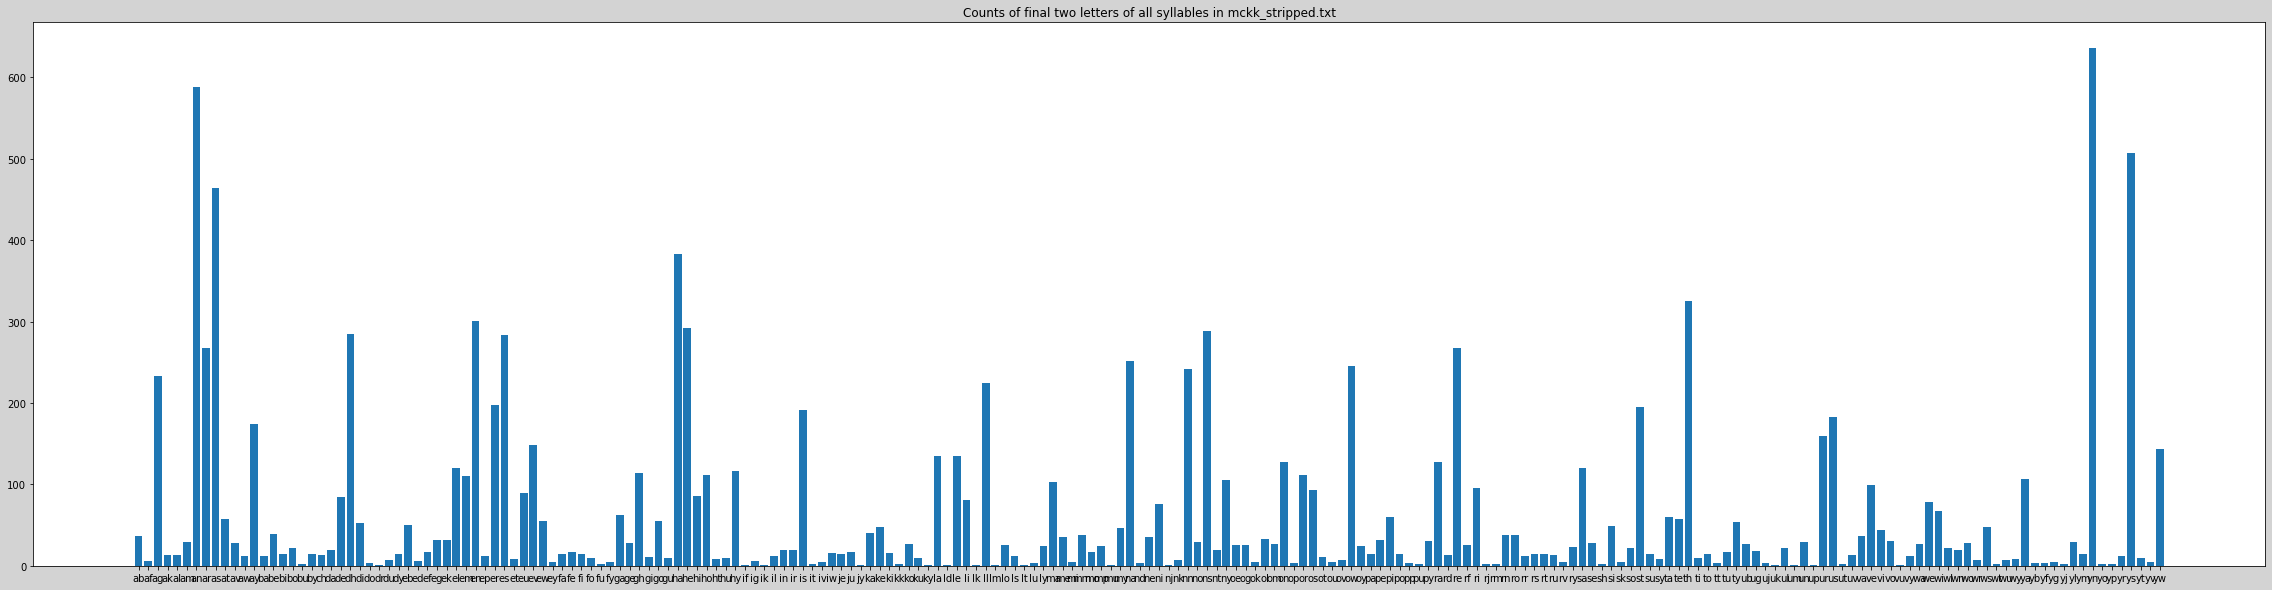

In [41]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter_end))
p1 = ax.bar(ind, syls_2letter_endN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter_end)
title = "Counts of final two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [42]:
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter_end[twoletters])

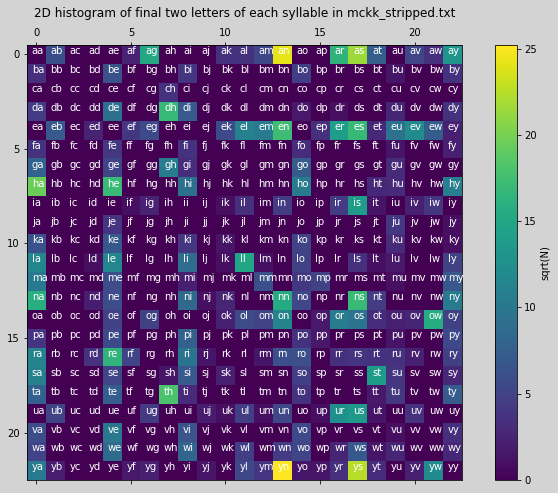

In [43]:
fig = plt.figure(figsize=[12,8], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of final two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")